## Построение и оформление графиков в `Python`. Библиотеки `Matplotlib` и `Seaborn` и их методы. Основные составляющие графика: оси, масштаб, подписи, легенда, погрешности. Основные виды графиков: линейные и маркерные, одномерные, двумерные и трехмерные, в декартовых и полярных координатах, контурные графики и тепловые карты.

### Библиотека `matplotlib`

Библиотека `matplotlib` -- это мощный графический инструмент языка `Python`, позволяющий визуализировать научные данные в виде разнообразных графиков (от простых `y(x)` до детализированных контурных карт) и подготавливать качественные рисунки, иллюстрации и даже анимированные изображения. Библиотека богата различными инструментами и cостоит из множества модулей, каждый со своими классами и функциями.

Процитируем небольшой фрагмент из [онлайн-учебника Павла Шабанова](https://github.com/whitehorn/Scientific_graphics_in_python) (орфография и пунктуация автора сохранена):

> Создание рисунка в matplotlib схоже с рисованием в реальной жизни. Так художнику нужно взять основу (холст или бумагу), инструменты (кисти или карандаши), иметь представление о будущем рисунке (что именно он будет рисовать) и, наконец, выполнить всё это и нарисовать рисунок деталь за деталью.
> 
> В matplotlib все эти этапы также существуют, и в качестве художника-исполнителя здесь выступает сама библиотека. От пользователя требуется управлять действиями художника-matplotlib, определяя что именно он должен нарисовать и какими инструментами. ... Таким образом, пользователь библиотеки matplotlib выступает в роли управленца.
> 
> Так как matplotlib организована иерархически, а наиболее простыми для понимания человеком являются самые высокоуровневые функции, то знакомство с matplotlib начинают с самого высокоуровневого интерфейса matplotlib.pyplot.

В рамках данного курса при построении графиков мы будем в основном взаимодействовать именно с уровнем `pyplot`.

### Представление одномерных данных

##### Простейшие графики

Самый простой линейный график по данным `(x,y)` можно построить всего одной командой библиотеки `matplotlib.pyplot` -- с помощью метода `plt.plot()` с передачей ему двух итерируемых объектов одинаковой длины.

Для подключения данного уровня обычно используют псевдоним `plt`.

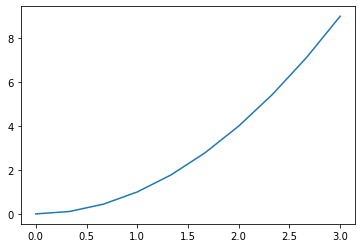

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 3., 10)  # вспомните, что делает эта строка кода
y = x**2.                   # а эта?

plt.plot(x, y)
plt.show()


**N.B.:** Команда `plt.show()` не имеет большого смысла при использовании в jupyter notebook (уберите ее и попробуйте сами), однако при запуске кода `.py` в иных средах она приведет к появлению отдельного окна с нарисованным графиком. В данном окне можно взаимодействовать с рисунком: менять диапазон и масштаб осей, а также размеры полей, отслеживать координаты точек по курсору мыши, сохранять картинку в отдельный файл. Это позволяет в довольно быстром режиме вручную настроить итоговый вид изображения перед его сохранением, однако стоит помнить, что не во всех случаях такой способ оказывается доступным (например, когда пользователь работает на удаленном расчетном кластере без графического интерфейса). Поэтому необходимо также иметь представление о том, как отредактировать график программным путем и сохранить его в нужном формате.

**N.N.B.:** Сгенерированный выше график был создан всего одной командой, однако, как уже упоминалось выше, на самом деле "за кулисами" было произведено сразу несколько действий:

1. было создано полотно, или "канва" (FigureCanvas), -- интерфейс, который задает область будущего изображения;
2. к созданной канве был прикреплен высокоуровневый объект "фигура" (Figure Artist), который будет вмещать в себя все элементы будущего графика;
3. на созданную фигуру был наложен объект "оси" (Axes Artist), на котором определено большинство методов библиотеки `matplotlib`;
4. и, наконец, на осях был изображен график (который, в свою очередь, состоит из примитивных элементов, таких как линии, точки, окружности, прямоугольники, текст).

Все эти действия за нас выполнил скрипт, реализованный в разделе `matplotlib.pyplot`. Отметим также, что диапазон и масштаб по обеим осям координат метод подобрал автоматически по переданным ему данным -- при изменении диапазона данных график автоматически перестроится.

Основные составляющие любого графика изображены на рисунке ниже (с оригиналом можно ознакомиться [здесь](https://matplotlib.org/stable/tutorials/introductory/usage.html)). Здесь синим курсивом обозначены названия элементов, а черным прямым шрифтом -- их имена, по которым пользователь может к ним обращаться.

<img src="https://matplotlib.org/stable/_images/anatomy.png" width="700" height="700" />



Изобразим теперь **точечную диаграмму** для случайного набора точек. Для этого применим другой метод -- `plt.scatter()`:

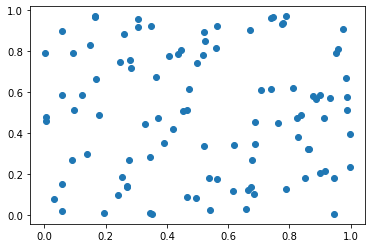

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = np.random.rand(100)

plt.scatter(x, y)


Отметим, что **любой график без обозначенных имен и единиц измерения осей, легенды и названия, как правило, весьма малоинформативен**. Поэтому нарисовать график мало -- необходимо дополнить его так, чтобы любой другой читатель смог бы понять, что именно изображено на графике.

### Основные команды работы с графиками


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Функция </th>
    <th class="tg-7btt">Основные параметры</th>
    <th class="tg-7btt">Описание</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">plt.plot(x, y, *параметры*)</td>
    <td class="tg-c3ow">Данные (`x`, `y`) <br> Цвет линии (`color` или `c`) <br> Толщина линии (`linewidth` или `lw`) <br> Тип линии (`linestyle` или `ls` ) <br> Маркер (`marker`) <br> Метка графика (`label`) </td>
    <td class="tg-0pky">Построение простого линейного графика</td>
  </tr>
  <tr>
    <td class="tg-0pky">plt.show()</td>
    <td class="tg-c3ow"></td>
    <td class="tg-0pky">Вывод графика на экран (отдельное окно)</td>
  </tr>
  <tr>
    <td class="tg-0pky">plt.scatter(x, y)</td>
    <td class="tg-c3ow">Данные (`x`, `y`) <br> Размер маркера (`size` или `s`) <br> Цвет маркера (`color` или `c`) <br> Цвет контура маркера (`edgecolors`) <br> Форма маркера (`marker`) <br> Метка графика (`label`) </td>
    <td class="tg-0pky">Точечная диаграмма</td>
  </tr>
  <tr>
    <td class="tg-0pky" rowspan="3">plt.savefig('plot.FMT')</td>
    <td class="tg-c3ow">png</td>
    <td class="tg-0pky" rowspan="3">Сохранить как изображение в формате FMT</td>
  </tr>
  <tr>
    <td class="tg-c3ow">pdf</td>
  </tr>
  <tr>
    <td class="tg-c3ow">eps</td>
  </tr>
  <tr>
    <td class="tg-0pky">plt.subplots()</td>
    <td class="tg-c3ow">Число рядов (`nrows`) <br>Число столбцов (`ncols`)</td>
    <td class="tg-0pky">Создает фигуру и сетку подграфиков одним вызовом</td 
  </tr>

</tbody>
</table>

### Полезные методы для настройки графиков: метки, подписи, параметры линий

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Функция </th>
    <td class="tg-7btt">Возможные <br> параметры</td>
    <th class="tg-7btt">Описание</th>
  </tr>
</thead>
<tbody>

  <tr>
    <td class="tg-0lax">plt.legend()</td>
    <td class="tg-0lax" rowspan="4">размер шрифта (`fontsize`) <br> начертание шрифта (`fontweight`) <br> стиль шрифта (`fontstyle`) <br> название шрифта (`fontname`) <br> цвет текста (`color`) </td>
    <td class="tg-0lax">Легенда</td>
  </tr>
  <tr>
    <td class="tg-0lax">plt.title('Chart title')</td>
    <td class="tg-0lax">Название графика</td>
  </tr>
  <tr>
    <td class="tg-0lax">plt.xlabel('x axis name', fontsize=16.)</td>
    <td class="tg-0lax">Подпись оси х</td>
  </tr>
  <tr>
    <td class="tg-0lax">plt.ylabel('у axis name', fontsize=16.)</td>
    <td class="tg-0lax">Подпись оси у</td>
  </tr>  
  <tr>
    <td class="tg-0pky">plt.xlim(1.5, 1.8)</td>
    <td class="tg-0pky" rowspan="2">Диапазон значений</td>      
    <td class="tg-0pky">Границы оси х</td>
  </tr> 
  <tr>
    <td class="tg-0pky">plt.ylim(0, 30)</td>    
    <td class="tg-0pky">Границы оси у</td>
  </tr>
  <tr>
    <td class="tg-0pky">plt.rc('text', usetex=True)</td>
    <td class="tg-0pky"></td>      
    <td class="tg-0pky">Разрешение использовать разметку Latex</td>
  </tr>
   <tr>
    <td class="tg-0pky" rowspan="4">plt.grid()</td>
    <td class="tg-c3ow">Показывать или нет (`visible` -- принимает True или False)</td>
    <td class="tg-0pky" rowspan="4">Создание сетки</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Какую сетку показывать (`which` -- принимает "major", "minor", "both")</td>
  </tr>
  <tr>
    <td class="tg-c3ow">По какой оси показывать (`axis` -- принимает "x", "y", "both")</td>
  </tr>
  <tr>
    <td class="tg-c3ow">`**kwargs` -- параметры линий сетки (цвет, толщина, начертание и т.д. Подробнее см. в документации к `plt.grid()`)</td>
  </tr>        
    
</tbody>
</table>

Рассмотрим примеры работы с графиками и их настройкой. Нарисуем 4 графика $x^n \sin{x}$ для разных $n$ и сделаем получившийся рисунок "красивым" и информативным.

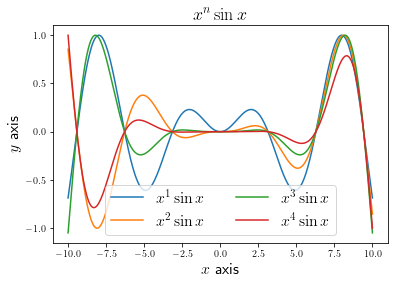

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)  # весь текст будет представляться как TeX-нотации

x = np.linspace(-10, 10, 1001)
for n in range(1, 5):
    y = x**n * (np.sin(x))
    y /= max(y)  # отнормируем графики для удобства
    # каждому графику будет присвоен своя индивидуальная метка
    plt.plot(x, y, label=r'$x^{}\sin x$'.format(n))
    # в случае смешения ТЕХ-нотации и форматирования в одной строке удобнее применять метод format

# Выводим легенду на график
# loc -- параметр, определяющий ее расположение (см. таблицу ниже)
# ncol -- количество столбцов в легенде. По умолчанию ncol=1
plt.legend(loc='lower center', fontsize=16., ncol=2)

# Выводим название графика и осей
# Обратите внимание на использование пары значков $$, указывающих, что текст,
# заключенный между ними, должен интерпретироваться как код на LaTEX!
plt.title(r'$x^n\sin x$', fontsize=18.)
plt.xlabel(r'$x$ axis', fontsize=16.)
plt.ylabel(r'$y$ axis', fontsize=16.)

plt.show()


### Способы расположения легенды на графике (параметр ```loc=LINE```)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Значение LINE (строка) </th>
    <th class="tg-7btt">Значение LINE (целое число) </th>
    <th class="tg-7btt">Значение LINE (строка) </th>
    <th class="tg-7btt">Значение LINE (целое число) </th>  
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">'best'</td>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">'center left'</td>
    <td class="tg-0pky">6</td>      
  </tr>
  <tr>
    <td class="tg-0pky">'upper right'</td>
    <td class="tg-0pky">1</td>
    <td class="tg-0pky">'center right'</td>
    <td class="tg-0pky">7</td>      
  </tr>
  <tr>
    <td class="tg-0pky">'upper left'</td>
    <td class="tg-0pky">2</td>
    <td class="tg-0pky">'lower center'</td>
    <td class="tg-0pky">8</td>      
  </tr>
  <tr>
    <td class="tg-0pky">'lower left'</td>
    <td class="tg-0pky">3</td>
    <td class="tg-0pky">'upper center</td>
    <td class="tg-0pky">9</td>      
  </tr> 
  <tr>
    <td class="tg-0pky">"lower right"</td>
    <td class="tg-0pky">4</td>
    <td class="tg-0pky">"center"</td>
    <td class="tg-0pky">10</td>      
  </tr> 
  <tr>
    <td class="tg-0pky">'right'</td>
    <td class="tg-0pky">5</td>
  </tr>

</tbody>
</table>

Обратите внимание на то, что, хоть названия осей и графика имеют крупный (установленный нами) шрифт, отметки на осях не стали крупнее. Попробуем это исправить в следующем графике.

До сих пор мы использовали `pyplot`-стиль построения графиков, однако, несмотря на то, что методы `pyplot` во многом делают работу за нас, иногда возникает необходимость брать часть управления в свои руки. В частности, создание осей: это особенно актуально, когда необходимо создать несколько графиков на одной картинке или вручную настроить отдельные ее параметры.

Рассмотрим пример такого "полуручного управления". Его называют объектно-ориентированным стилем.

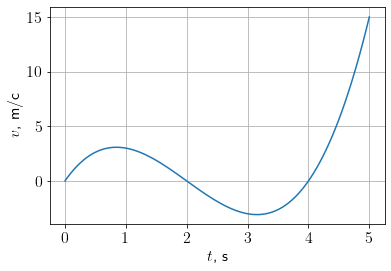

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Зададим данные
x = np.linspace(0, 5, 100)
y = x*(x - 2)*(x - 4)

# Метод plt.subplots() позволяет одновременно сделать два действия:
# 1) создать фигуру (fig) и 2) связать с нею оси (ax)
# По умолчанию создается только одна область осей, как в данном случае
fig, ax = plt.subplots()

# Обращаемся к осям ax и строим на них график
ax.plot(x, y)
# Создаем сетку
ax.grid()

# Добавляем подписи к осям.
# Обратите внимание, что вместо метода xlabel() используется set_xlabel
ax.set_xlabel('$t$, s', fontsize=16)
ax.set_ylabel('$v$, m/c', fontsize=16)

# Изменим размер меток на обеих (both) осях одновременно
ax.tick_params(axis='both', labelsize=16)


### Полезные параметры команды ```plt.plot()``` на двух примерах

1. ```plt.plot(x, y, color='r', linestyle=':', linewidth=4., marker='o')```

2. ```plt.plot(year , np.log10(ntrans), '*', markersize=12, color='r', markeredgecolor='r', label='observed')```

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Параметр </th>
    <th class="tg-7btt">Описание</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">color</td>
    <td class="tg-0pky">Цвет линии графика</td>
  </tr>
  <tr>
    <td class="tg-0pky">linestyle</td>
    <td class="tg-0pky">Стиль линии</td>
  </tr>
  <tr>
    <td class="tg-0pky">linewidth</td>
    <td class="tg-0pky">Толщина линии</td>
  </tr>
  <tr>
    <td class="tg-0pky">'*' (маркер)</td>
    <td class="tg-0pky">Обозначение точек на графике</td>
  </tr> 
  <tr>
    <td class="tg-0pky">markersize</td>
    <td class="tg-0pky">Размер маркера</td>
  </tr> 
  <tr>
    <td class="tg-0pky">markeredgecolor</td>
    <td class="tg-0pky">Цвет контура маркера</td>
  </tr>
  <tr>
    <td class="tg-0pky">label='label'</td>
    <td class="tg-0pky">Метка графика в легенду</td>
  </tr>

</tbody>
</table>

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
    
  <tr>
    <th class="tg-amwm" colspan="3">Маркеры точек </th>
    <th class="tg-amwm" colspan="2">Цвета линий/маркеров</th>
    <th class="tg-amwm" colspan="2">Стили линий</th>
  </tr>
      <tr>
    <th class="tg-amwm" colspan="3"></th>
    <th class="tg-amwm" colspan="2">color</th>
    <th class="tg-amwm" colspan="2">linestyle</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-amwm">Код</td>
    <td class="tg-amwm">Маркер</td>
    <td class="tg-amwm">Описание</td>
    <td class="tg-amwm">Коды основных цветов</td>
    <td class="tg-amwm">Живые (Tableau) цвета</td>
    <td class="tg-amwm">Код</td>
    <td class="tg-amwm">Стиль линии</td>
  </tr>
  <tr>
    <td class="tg-baqh">.</td>
    <td class="tg-baqh">∙</td>
    <td class="tg-0lax">Точка</td>
    <td class="tg-0lax">b = синий</td>
    <td class="tg-0lax">tab:blue</td>
    <td class="tg-baqh">-</td>
    <td class="tg-0lax">Сплошная</td>
  </tr>
  <tr>
    <td class="tg-baqh">o</td>
    <td class="tg-baqh">○</td>
    <td class="tg-0lax">Кружок</td>
    <td class="tg-0lax">g = зеленый</td>
    <td class="tg-0lax">tab:green</td>
    <td class="tg-baqh">--</td>
    <td class="tg-0lax">Штриховая</td>
  </tr>
  <tr>
    <td class="tg-baqh">+</td>
    <td class="tg-baqh">+</td>
    <td class="tg-0lax">Знак плюс</td>
    <td class="tg-0lax">r = красный</td>
    <td class="tg-0lax">tab:red</td>
    <td class="tg-baqh">:</td>
    <td class="tg-0lax">Пунктирная</td>
  </tr>
  <tr>
    <td class="tg-baqh">x</td>
    <td class="tg-baqh">×</td>
    <td class="tg-0lax">Крестик</td>
    <td class="tg-0lax">m = фиолетовый</td>
    <td class="tg-0lax">tab:purple</td>
    <td class="tg-baqh">-.</td>
    <td class="tg-0lax">Штрихпунктирная</td>
  </tr>
  <tr>
    <td class="tg-baqh">D</td>
    <td class="tg-baqh">⋄</td>
    <td class="tg-0lax">Ромбик</td>
    <td class="tg-0lax">c = бирюзовый</td>
    <td class="tg-0lax">tab:olive</td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-baqh">v</td>
    <td class="tg-baqh">∇</td>
    <td class="tg-0lax">Треугольник с вершиной вниз</td>
    <td class="tg-0lax">y = желтый</td>
    <td class="tg-0lax">tab:orange</td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-baqh">^</td>
    <td class="tg-baqh">∆</td>
    <td class="tg-0lax">Треугольник с вершиной вверх</td>
    <td class="tg-0lax">k = черный</td>
    <td class="tg-0lax">tab:gray</td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-baqh">s</td>
    <td class="tg-baqh">□</td>
    <td class="tg-0lax">Квадратик</td>
    <td class="tg-0lax">w = белый</td>
    <td class="tg-0lax">tab:brown</td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-baqh">*</td>
    <td class="tg-baqh">★</td>
    <td class="tg-0lax">Звездочка</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">tab:pink</td>
    <td class="tg-0lax"></td>
  </tr>
 <tr>
 <tr>
    <td class="tg-baqh"></td>
    <td class="tg-baqh"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax">tab:cyan</td>
    <td class="tg-0lax"></td>
    <td class="tg-0lax"></td>
  </tr>

</tbody>
</table>

А еще в ```matplotlib``` встроено некоторое количество "названных" цветов (например, salmon, darkseagreen, indigo, и т. д.). Полный список можно найти [здесь](https://matplotlib.org/stable/gallery/color/named_colors.html).

**N.B.:** Первый (1) вариант нарисует линию с маркерами в каждой точке. Второй (2) вариант нарисует только маркеры в виде звездочек без соединительных линий.

Объединим все вышесказанное в один пример

Text(0.5, 1.0, "Moore's law")

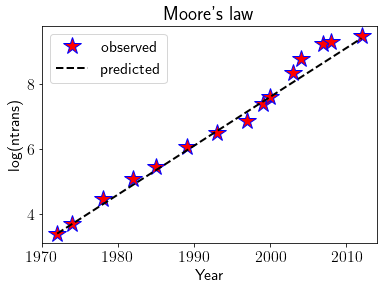

In [ ]:
# В качестве илюстрации взят пример демонстрации действия закона Мура
# [Кристиан Хилл. Научное программирование на Python
# / пер. с анг. А.В. Снастина. – М.: ДМК Пресс, 2021. – 646 с.: ил.]

import numpy as np
import matplotlib.pyplot as plt

# Избавим себя от необходимости каждый раз задавать размер шрифта
plt.rcParams['font.size'] = '16'

# Данные - список лет:
year = [1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2003,
        2004, 2007, 2008, 2012]
# Количество транзисторов (ntrans) в ЦПУ в млн:
ntrans = [0.0025, 0.005, 0.029, 0.12, 0.275, 1.18, 3.1, 7.5, 24.0, 42.0,
          220.0, 592.0, 1720.0, 2046.0, 3100.0]

# Преобразование списка ntrans в массив NumPy и умножение каждого элемента на 1 млн.
ntrans = np.array(ntrans) * 1.e6
y0, n0 = year[0], ntrans[0]
# Линейный массив лет, охватывающий данные по отдельным годам.
y = np.linspace(y0, year[-1], year[-1] - y0 + 1)
# Время в годах, необходимое для удваивания количества транзисторов.
T2 = 2.

moore = np.log10(n0) + (y - y0)*np.log10(2)/T2

plt.plot(year, np.log10(ntrans), '*', markersize=18, color='r',
         markeredgecolor='b', label='observed')
plt.plot(y, moore, linewidth=2, color='k', linestyle='--', label='predicted')

plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('log(ntrans)')
plt.title("Moore's law")


### Погрешности

Любые измерения или расчеты сопровождаются теми или иными ошибками, приводящими к возникновению погрешностей. При представлении результатов работы обязательно нужно указывать, с какой точностью были получены и рассчитаны данные. Это особенно важно, когда при обработке данных производится подгон некой функции к зависимости (фит), извлекается некая новая величина или оценивается, в какой точке график пересечет ту или иную ось. Для отображения погрешностей данных на графиках в `matplotlib` предусмотрен метод `errorbar`.

Продемонстрируем его сразу на примере.

Text(0, 0.5, '$y$')

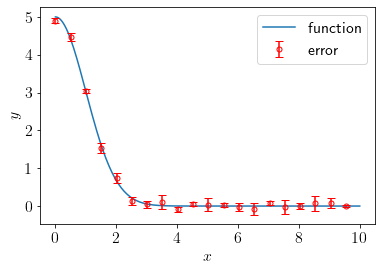

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Создадим набор данных -- экспоненциально затухающая функция
x = np.linspace(0, 10, 200)
maxy = 5.
y = maxy * np.exp(-x**2. / 2)

# Нарисуем исходную функцию
plt.plot(x, y, label='function')

# Добавим к каждой точке случайный "дребезг" -- в пределах 2% от максимального значения функции
y += maxy * (1 - 2*np.random.rand(200))*0.02
# Создадим массив с погрешностями -- для примера зададим их случайно, в пределах 4% от максимума
yerr = np.random.rand(200)*maxy*0.04

# Нарисуем погрешности для некоторых точек и обозначим эти точки красными пустыми кружками
# ## Добавлять маркеры вовсе не обязательно -- попробуйте убрать соответствующие параметры

# capsize -- величина "шапочек" погрешностей
# errorevery -- рисовать погрешность не для каждой точки, а для каждой n-ой
# linestyle='' -- отключает рисование линий на графике (уберите его и посмотрите, что будет)
# ecolor -- цвет обозначения погрешностей
# markevery -- добавлять маркеры не к каждой точке
# ms  -- то же самое, что markersize
# mfc -- то же самое, что markerfacecolor
# mec -- то же самое, что markeredgecolor
plt.errorbar(x, y, yerr, capsize=4, errorevery=10, linestyle='', ecolor='r',
             marker='o', markevery=10, ms=5, mfc='none', mec='r', label='error')

plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')


### Создание полярных графиков
Наряду с простыми графиками, задавемыми зависимостями y = f(x) в декартовой системе координат на плоскости, вам придётся также сталкиваться с графиками, задаваемыми неявными функциями или в системе координат, отличной от прямоугольной.

Распространенным вариантом графиков подобного рода являются полярные графики, задаваемые как

~~~
x = f(r, phi)
y = g(r, phi)
~~~

где `(x, y)` -- декартовы координаты точки на плоскости, а `(r, phi)` -- координаты точки в полярных координатах, причём `r = r(phi)`. Примером полярного график являются диаграммы направленности, определяющие интенсивность излучения, испускаемого в определенный телесный угол (диаграмма направленности излучения Черенкова, диаграммы вторичной эмиссии электронов и др.).

Для построения полярного графика можно использовать функцию `polar`. Пример её использования для построения графиков логарифмической спирали и кардиоды -- ниже:

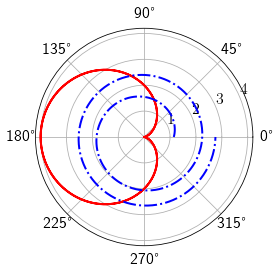

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# определим набор отсчётов по полярному углу
phi = np.linspace(0, 4.*np.pi, 200)
# определим набор отсчётов по r, определяющих кардиоду...
r = 2.0*(1.0 - np.cos(phi))
# и логарифмической спирали
s = np.log(phi + np.pi)

# теперь строим график
plt.polar(phi, r, linewidth=2.0, color='r', linestyle='-')
plt.polar(phi, s, linewidth=2.0, color='b', linestyle='-.')


### Представление двумерных данных

При работе с данными очень часто возникают ситуации, когда необходимо представить зависимости некой величины не от одной, а от нескольких переменных, иными словами, возникает необходимость представления многомерных данных.

Представление трёхмерных данных и данных более высоких размерностей требует использования срезов или обработки в специализированном ПО (как например, при построении поверхностей уровней трёхмерных функций). Эти вопросы выходят за рамки нашего курса. Ниже мы ограничимся рассмотрения наиболее часто возникающих на практике случаев представления двумерных зависимостей вида f(x, y).

При обычном подходе к вопросу нам потребовалось бы построить в трёхмерном пространстве поверхность, описываемую функцией f. Анализ получаемых данных при этом потребовал бы громоздкого и неудобного рассмотрения поверхности и её особенностей.

По этой причине при анализе данных, отвечающих зависимостям вида f(x, y), работают не с трёхмерным (в виде поверхности), а с двумерным их представлением. Для этого используют различные методы, среди которых -- построение контурных и тепловых карт.

##### Контурные карты
*Контурной картой* функции f(x, y) называют совокупность линий уровня f(x, y) = const на плоскости. Контуры могут образовать причудливую конфигурацию вложенных/замкнутых/разомкнутых/... линий, относительное расположение которых позволяет изучать поведение функции в области её определения. В задачах электростатики линии уровня называются *эквипотенциалями*. В теории поверхностей линии получили название *геодезических*, поскольку на картах подобными линиями обозначается связанное множество точек на карте, расположенных на одной высоте.

Для построения контурной карты в модуле matplotlib есть функция `contour`. Ниже представлен пример её использования с указанием основных параметров.

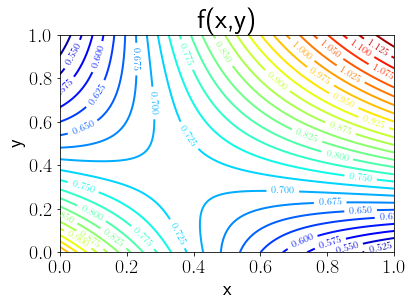

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# задача - в квадрате [0; 1]x[0; 1] построить контурную карту
# для функции f(x,y) = 1/(x + y - 1) + sin(xy)

# сначала готовим данные для построения графиков
# задаём диапазоны изменения параметров x и y
x = np.linspace(0, 1., 100)
y = np.linspace(0, 1., 100)

# теперь готовим двумерную сетку координат...
X, Y = np.meshgrid(x, y)  # функция преобразует одномерные массивы в двумерную сетку
# ... значения искомой функции
f = 1./(X + Y + 1) + np.sin(X*Y)

# теперь строим карту
ptr = plt.contour(X, Y, f, cmap=plt.cm.jet, linewidths=2, levels=30)
# cmap - цветовая схема для отрисовки линий уровня
# linewidths - толщина линий (может быть как число, так и массив значений)
# levels - число эквипотенциалей (можно задать массив значений f, на которых должны быть заданы линии уровня)
# обратите внимание на наличие Х-точки и сепаратрисы - асимптот, отделяющих семейства кривых друг от друга

# добавим подписи значений функции для каждой линии уровня
plt.clabel(ptr, inline=1, fontsize=10)

# добавим подписи к осям и принудительно отрисуем объекты на холсте
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('f(x,y)', fontsize=28)
plt.xticks(fontsize=20)  # Еще один способ задать размер меток на осях
plt.yticks(fontsize=20)
plt.show()

# полный список параметров, которые можно передать в функцию, можно найти по
# адресу https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html


##### Тепловые карты
Другим средством двумерного представления трёхмерных данных является использование тепловых карт.

*Тепловая карта* - график на плоскости, в котором для представления значения функции используется цвет, так что точки на плоскости, отвечающие условию f(x,y) = const, окрашены одинаковым образом.

Главное отличие тепловой карты от контурной - в непрерывности представления данных. Тепловая карта может быть получена из контурной закрашиванием пространства между двумя соседними линиями уровня.

Для отрисовки тепловой карты используется функция `contourf`. Синтаксис и пример приведены ниже.

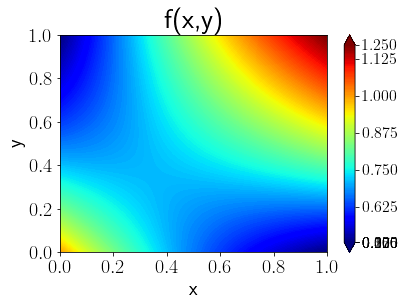

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# задача - в квадрате [0; 1]x[0; 1] построить тепловую карту
# для функции f(x,y) = 1/(x + y - 1) + sin(xy)

# задаём диапазоны изменения параметров x и y
x = np.linspace(0, 1., 100)
y = np.linspace(0, 1., 100)

# готовим двумерную сетку координат и...
X, Y = np.meshgrid(x, y)  # функция преобразует одномерные массивы в двумерную сетку
# ... значения искомой функции
f = 1./(X + Y + 1) + np.sin(X*Y)

# теперь строим карту - обратите внимание на вызов contourf
ptr = plt.contourf(X, Y, f, cmap=plt.cm.jet, levels=200, extend='both')
# cmap - цветовая схема для отрисовки линий уровня
# levels - число эквипотенциалей (можно задать массив значений f, на которых должны быть заданы линии уровня) для построения карты
# extend - необязательный параметр, указывающий необходимость расширения значений на цветовой шкале значений
# цвет в уголке на конце шкалы отмечает все значения функции f, выходящие за предельные значения на цветовой шкале

# вместо подписей для линий уровня при построении тепловой карты строится цветовая шкала
plt.colorbar(ptr, ticks=[i for i in np.linspace(0., 1.25, 11)])

# добавим подписи к осям и принудительно отрисуем объекты на холсте
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('f(x,y)', fontsize=28)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# список параметров, которые можно передать в функцию, почти аналогичен функции contour и может быть найден по адресу
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf
# синтаксис построения цветовой шкалы - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html#matplotlib.pyplot.colorbar


### Представление нескольких графиков в одном окне
При решении практических задач могут возникать ситуации, когда в одном окне должны быть построены разнородные данные, например временная развертка сигнала и его частотный спектр, выполнить которую на одном графике невозможно.

В этом случае необходимо создание нескольких полотен, каждое из которых будет использовано для построения своего набора данных.

Основная функция, которая используется для создания нескольких полотен, - `subplots`.

Пример организации данных - ниже.

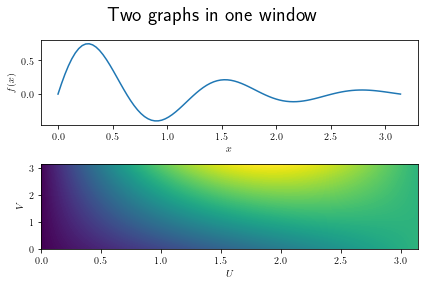

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# построим в одном окне два графика:
# один - обычный двумерный, второй - тепловая карта

# данные для первого графика функции f(x) = sin(5x)*exp(-x)
x = np.linspace(0., np.pi, 100)
y = np.sin(5.0*x)*np.exp(-x)

# данные для второго графика g(u,v) = u + v*sin(u)
u = np.linspace(0., np.pi, 100)
v = np.linspace(0., np.pi, 100)
U, V = np.meshgrid(u, v)
g = U + V*np.sin(U)

# теперь построим графики
# сначала разметим окно на две области в вертикальном направлении и 1 - в горизонтальном
fig, ax = plt.subplots(nrows=2, ncols=1)

# для обращения к канве используем параметр ax (список, хранящий указатели на
# каждый из холстов) и построим график f(x) на первом холсте
ax[0].plot(x, y)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$f(x)$')

# теперь - график r(phi)
ax[1].contourf(U, V, g, levels=200)
ax[1].set_xlabel(r'$U$')
ax[1].set_ylabel(r'$V$')

# теперь оптимизируем расстояния между холстами, используя встроенную функцию
# tight_layout из модуля matplotlib, и добавим общее название графика
plt.suptitle(r'Two graphs in one window', fontsize=20)
plt.tight_layout()


**N.B.:** задать несколько осей можно было и по-другому:

~~~
fig, (line_f, map_f) = plt.subplots(2, 1)

line_f.plot(x, y)
line_f.set_xlabel(r'$x$', fontsize=12)
line_f.set_ylabel(r'$f(x)$', fontsize=12)

map_f.contourf(U, V, g, levels=200)
map_f.set_xlabel(r'$U$', fontsize=12)
map_f.set_ylabel(r'$V$', fontsize=12)
~~~

Т. е., в явном виде присвоить имена каждой из осей. Это может быть удобно в случаях, когда на графиках изображены существенно разные картины.

### Трехмерные графики

Основной особенностью построения трехмерных графиков является создание сетки координат по х и у. Для вызова необходимо подключить дополнительную библиотеку:

~~~
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
~~~

###### Два главных метода построения трехмерных графиков:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:2;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Метод </th>
    <th class="tg-7btt">Параметры</th>
    <th class="tg-7btt">Описание</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">ax.plot_wireframe()</td>
    <td class="tg-0pky">rstride <br> cstride </td>
    <td class="tg-0pky">Каркасная диаграмма <br> (проволочная модель) </td>
  </tr>
  <tr>
    <td class="tg-0pky">ax.plot_surface()</td>
    <td class="tg-0pky">rstride <br> cstride <br>  cmap </td>
    <td class="tg-0pky">объемная поверхность диаграммы <br> из закрашенных элементов</td>
  </tr>
  <tr>

</tbody>
</table>



Основные параметры 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-7btt">Параметр </th>
    <th class="tg-7btt">Описание</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">color</td>
    <td class="tg-0pky">Цвет линии графика</td>
  </tr>
  <tr>
    <td class="tg-0pky">rstride</td>
    <td class="tg-0pky">Шаг изображаемых точек в строках </td>
  </tr>
  <tr>
    <td class="tg-0pky">cstride</td>
    <td class="tg-0pky">Шаг изображаемых точек в столбцах</td>
  </tr>
  <tr>
    <td class="tg-0pky">cmap</td>
    <td class="tg-0pky">Цветовая карта</td>
  </tr> 
  <tr>
    <td class="tg-0pky">edgecolors</td>
    <td class="tg-0pky">цвет края маркера (элемента)</td>
  </tr> 
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky"></td>
  </tr>

</tbody>
</table>



(1) и (2) В приведенном ниже примере отличаются шагом изображаемых точек. (1) -- более крупный шаг, (2) -- более мелкий. Для `ax.plot_surface` по умолчанию шаг=10.

(3) 3-х мерный график (Поверхностная диаграмма) с использованием одной из стандартных цветовых карт -- распределение цветов в зависимости от значения по оси z.

Для отрисовки графиков можно использовать различные встроенные цветовые схемы (```cmap=cm.MAPNAME```):

<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_001.png" width="600" />


<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png" width="600" />
<img src="https://matplotlib.org/stable/_images/sphx_glr_colormaps_003.png" width="600" />

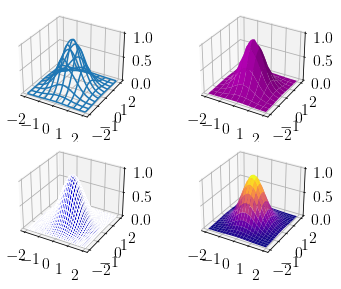

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

L, n = 2, 400
x = np.linspace(-L, L, n)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2))

# В первых двух аргументах пропущены записи "nrows=" и "ncols="
fig, ax = plt.subplots(2, 2, subplot_kw={'projection': '3d'})

ax[0, 0].plot_wireframe(X, Y, Z, rstride=40, cstride=40)
ax[0, 1].plot_surface(X, Y, Z, rstride=40, cstride=40, color='m')  # (1)
ax[1, 0].plot_surface(X, Y, Z, rstride=12, cstride=12, color='b', edgecolors='w')  # (2)
ax[1, 1].plot_surface(X, Y, Z, rstride=20, cstride=20, cmap=cm.plasma)  # (3)

for axes in ax.flatten():
    axes.set_xticks([-2, -1, 0, 1, 2])
    axes.set_yticks([-2, -1, 0, 1, 2])
    axes.set_zticks([0, 0.5, 1])

fig.tight_layout()


В координатной плоскости $xyz$ можно изменять изометрию (направление взгляда), если щелкнуть мышкой и, не отпуская левой кнопки, перетаскивать любую точку в области графика. Для фиксации конкретного направления взгляда в статическом изображении графика необходимо явно передать требуемый угол возвышения и азимутальный угол (в градусах, в указанном порядке) в метод **```ax.view_init()```**.

В примере ниже рассмотрим также новый способ добавления осей на область (пока еще пустой) фигуры: ```fig.add_subplot()```. В качестве первого аргумента может быть указано трехзначное число, в котором первая цифра соответствует количеству создаваемых строк подграфиков, вторая - количеству создаваемых столбцов, а третья - порядковому номеру каждого подграфика. Простейший случай - создание одиночного графика (`fig.add_subplot(111)`).

[]

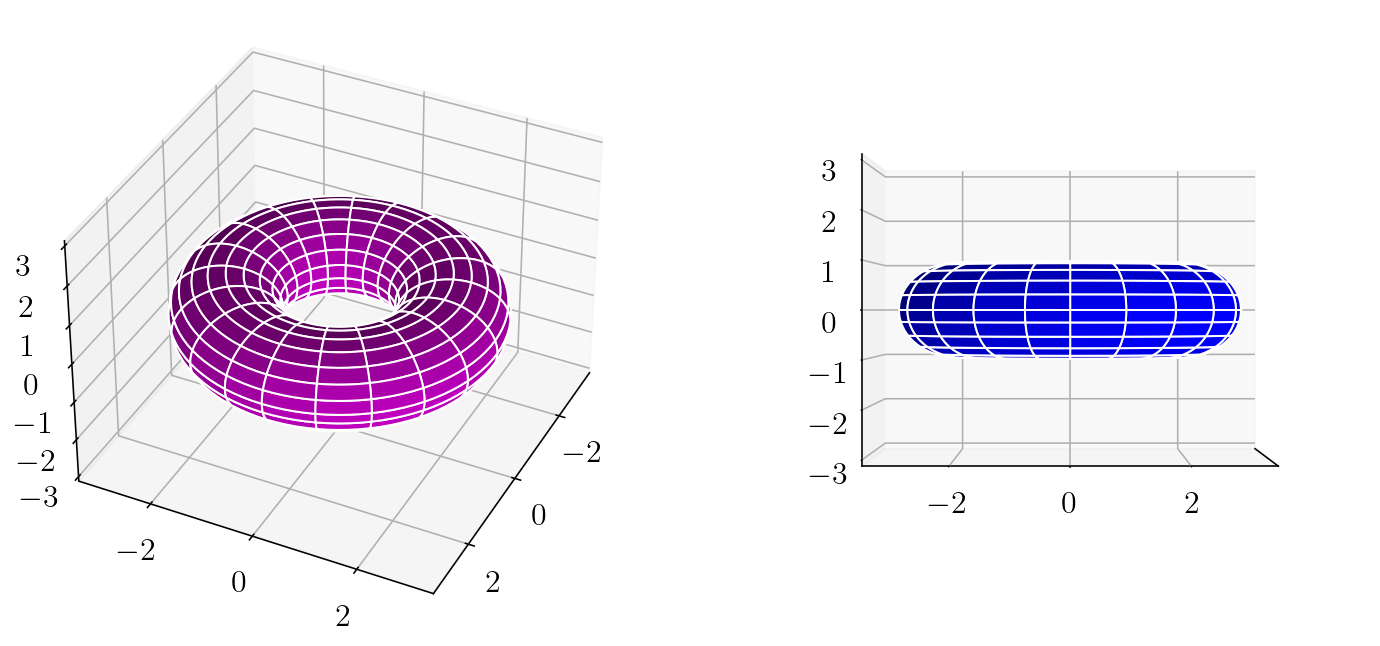

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 100
theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)

c, a = 2, 1
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

fig = plt.figure()

# Создаем одну строку и два столбца трехмерных графиков и обращаемся к первому
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_zlim(-3, 3)
ax1.plot_surface(x, y, z, rstride=5, cstride=5, color='m', edgecolors='w')
ax1.view_init(36, 26)

# Обращаемся ко второму графику в сетке 1х2
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_zlim(-3, 3)
ax2.plot_surface(x, y, z, rstride=5, cstride=5, color='b', edgecolors='w')
ax2.view_init(0, 0)
ax2.set_xticks([])
